<a href="https://colab.research.google.com/github/Miswanto313/a14-made-labs2/blob/master/SKLearn_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data diambil dari Kaggle yaitu data pengunjung sebuah mall fiktif. Dataset bisa kamu dapatkan pada [tautan](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) berikut

**Library yang dibutuhkan**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Ubah file csv kita ke dalam dataframe pandas dan menampilkan 3 baris pertama dari dataframe**

In [9]:
#ubah file csv menjadi dataframe
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# tammpilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Kemudian kita akan melakukan sedikit preprocessing yaitu mengubah nama kolom agar lebih seragam. Lalu kolom gender adalah kolom kategorik, maka kita akan mengubah data tersebut menjadi data numerik

In [12]:
#ubah nama kolom
df = df.rename(columns={
    'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Di tahap selanjutnya kita akan mengimpor K-Means. Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering

In [13]:
from sklearn.cluster import KMeans

#menghilangkan kolom cutomer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   gender          200 non-null    int64
 2   age             200 non-null    int64
 3   annual_income   200 non-null    int64
 4   spending_score  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.

In [20]:
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Kode di bawah untuk membuat plot dari inersia setiap K berbeda. Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5.

Text(0, 0.5, 'Inertia')

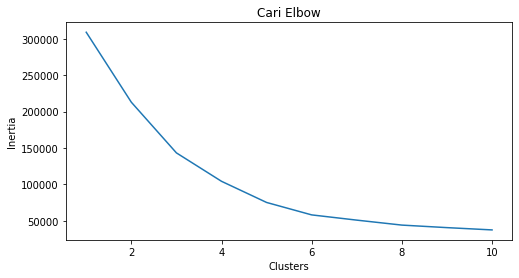

In [21]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

**Membuat plot hasil pengklasteran K-Means**

In [22]:
#membuat objek kmeans
km5 = KMeans(n_clusters=5).fit(X)



In [23]:
#menambahkan kolom label pada datasets
X['Labels'] = km5.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


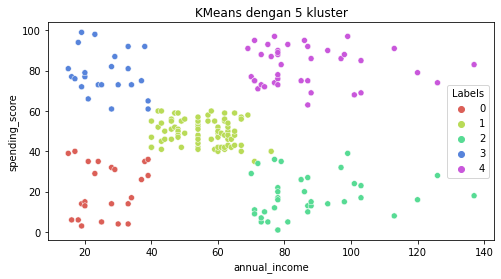

In [30]:
#membuat plot kmeans dengan 5 kluster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 5 kluster')
plt.show()